# Real-time Loan Approvals: Predictive Modeling with Ensemble Learning

![ensemble](https://music.unc.edu/wp-content/uploads/sites/120/2013/09/1484014_10151881768213591_277633653_o.jpg)

**Ensemble learning** is the process by which multiple models, such as classifiers, are generated and combined to solve a particular problem better than single models could.    

Ensemble learning is commonly used in machine learning to improve classification or regression models.

# Today's Business Problem:


![RoboLoan](https://www.open.edu/openlearn/pluginfile.php/3277516/tool_ocwmanage/articletext/0/wall-e-large.jpg)

### **A Fintech wants to automate the loan approval process in real-time...**
### **...based on information that applicants provide about themselves online.**

1. What is the ***value*** of such automation?
  - To the start-up
  - To its client
  - To the applicant

2. What would a great ***product*** (or service) look like?
  - From the client's perspective
  - From the consumers' perspective

3. What ***problem*** needs to be solved?

4. What a potential ***pitfalls***?

5. What ***data*** would the start-up require to solve the problem?




## **Supervised Machine Learning:** Predictions from data with ***labels*** and ***features***  

*We will use Supervised (Machine) Learning to solve the FinTech's problem.*

**Objective** of Supervised (Machine) Learning: Automate time-consuming or expensive manual tasks  

**Examples:**
- Recommendation systems
- Email subject optimization
- Fraud detection

**Requires:** Labeled data  
- Historical data with labels
- Experiments to get labeled data
- Crowd-sourcing labeled data

**Taks/Models:**
- Classification: should we target a consumer?
- Regression: how much revenue can we expect from a consumer?

Today, firms largely use (are biased towards) classification models.  
This bias towards classification models is largely driven by the fact that most analytical problems involve making a decision that requires a simple Yes/No answer:


#### Finance

 - Credit Scoring: Assessing the creditworthiness of individuals or companies to predict their likelihood of defaulting on loans.
 - Fraud Detection: Identifying fraudulent transactions in banking or credit card operations.
 - Customer Segmentation: Categorizing customers into different groups based on their spending behavior or preferences for targeted marketing.
 - Risk Management: Classifying investment opportunities or loans into various risk categories.

#### Operations

 - Demand Forecasting: Predicting product demand to classify products into various demand levels for inventory management.
 - Quality Control: Using automated systems to classify products as defective or non-defective in manufacturing.
 - Predictive Maintenance: Identifying equipment or machinery that is likely to fail or need maintenance soon.
 - Supply Chain Management: Classifying suppliers based on reliability and performance.

#### Human Resources (HR)

 - Employee Attrition Prediction: Predicting which employees are likely to leave the company.
 - Talent Acquisition: Automating the screening of job applications to classify candidates as suitable or not for further rounds.
 - Performance Evaluation: Classifying employees based on performance metrics for appraisals or promotions.
 - Employee Engagement Analysis: Categorizing employees based on engagement levels for targeted HR interventions.

#### Accounting

 - Expense Classification: Automating the categorization of expenses into different accounts for accounting purposes.
 - Audit Risk Assessment: Identifying transactions or accounts that are at higher risk of errors or fraud for audit prioritization.
 - Financial Statement Analysis: Classifying companies or financial statements based on financial health indicators.
 - Tax Filing and Compliance: Classifying transactions for appropriate tax treatment and compliance.

#### Healthcare
 - Medical Imaging Analysis: Using techniques like computer vision to classify images from MRIs, CT scans, and X-rays for the identification of abnormalities, tumors, fractures, etc.
 - Readmission Prediction: Identifying patients who are at a higher risk of readmission after discharge, which is important for improving patient outcomes and reducing healthcare costs.
 - Medical Billing and Coding: Automating the classification of diagnoses and procedures into the appropriate billing codes.
 - Clinical Trial Participant Selection: Identifying and classifying suitable participants for clinical trials based on their health status, medical history, and other criteria.

Such analysis are insightful and can be directly linked to an implementation roadmap.


# 1. Dataset: ***Loan Eligibility and Applicant Information***

[*Based on an Analytics Vidhya practice competition*](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

A Fintech wants to automate the loan eligibility process (in real time) based on the details that applicants provide in their online application. These details are:

- Gender
- Marital Status
- Education
- Number of Dependents
- Income
- Loan Amount
- Credit History and others.

To automate this process, the Fintech needs to assign applicants to either being eligible for the requested loan (amount), or not. You are provided with a training dataset in which the loan eligibility is marked.
The dataset contains the following variables:

| Variable          	 | Description                     	 |
|---------------------|-----------------------------------|
| Loan_ID           	 | Unique Loan ID                  	 |
| Gender            	 | Male/ Female                    	 |
| Married           	 | Applicant married (Y/N)         	 |
| Dependents        	 | Number of dependents            	 |
| Education         	 | Graduate/ Under Graduate        	 |
| Self_Employed     	 | Self employed (Y/N)             	 |
| ApplicantIncome   	 | Applicant income                	 |
| CoapplicantIncome 	 | Coapplicant income              	 |
| LoanAmount        	 | Loan amount in thousands        	 |
| Loan_Amount_Term  	 | Term of loan in months          	 |
| Credit_History    	 | credit history meets guidelines 	 |
| Property_Area     	 | Urban/ Semi Urban/ Rural        	 |
| Loan_Status       	 | Loan approved (Y/N)             	 |

You can download the dataset ***loan_train.csv*** from CANVAS along with the notebook of this class.

## 1.1 Load and Explore the Data

In [ ]:
# 1. Connect out notebook with out Google Drive and navigate to the directory in which we saved the data file(s)

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class18

In [ ]:
!ls # special shell command to view the files in the home directory of the notebook environment (! command has no lasting effect)

**A note on shell commands in python notebooks:** The difference between **!** and **%**

- **!** calls out to a shell (in a new process),
- **%** affects the process associated with the notebook (or the notebook itself)
- many **%** commands have no shell counterpart.

***!cd foo***, by itself, has no lasting effect, since the process with the changed directory immediately terminates.

***%cd foo*** changes the current directory of the notebook process, which is a lasting effect.

In [ ]:
# 2. import some libraries that you will need for this step
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 3. import the data file
data_train = pd.read_csv("loan_train.csv") # parse to a Pandas DataFrame using pd.read_csv()

# 4. Output the first 10 rows --> What do you observe?
data_train.head(10)

In [ ]:
# prompt: Using dataframe data_train: Describe this dataset in a few different ways

# 5. Let's get some descriptives

# Describe the entire dataset
data_train.describe()
# data_train.describe(include='number') $ Try me

In [ ]:
# prompt: Using dataframe data_train: How many loan request were approved vs declined? make a histogram

# 6. How many loan request were approved vs declined?
loan_status_counts = data_train['Loan_Status'].value_counts()
loan_status_counts.plot(kind='bar')


In [ ]:
# prompt: Do the same for gender

# 7. We could also look at counts for individual features
print(data_train['Gender'].value_counts())
data_train['Gender'].value_counts().plot(kind='bar')

In [ ]:
# 8. Let's create barcharts that show frequencies of approve vs. decline by categorical variable
fig, axarr = plt.subplots(3, 2, figsize=(16, 14))
sns.countplot(x='Married', hue = 'Loan_Status',data = data_train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Loan_Status',data = data_train, ax=axarr[0][1])
sns.countplot(x='Dependents', hue = 'Loan_Status',data = data_train, ax=axarr[1][0])
sns.countplot(x='Self_Employed', hue = 'Loan_Status',data = data_train, ax=axarr[1][1])
sns.countplot(x='Credit_History', hue = 'Loan_Status',data = data_train, ax=axarr[2][0])
sns.countplot(x='Property_Area', hue = 'Loan_Status',data = data_train, ax=axarr[2][1])

## 1.2 Preprocess the Data

In [ ]:
# 1. The first column (Loan_ID) is not informative to our task. So let's drop it!
data_train=data_train.drop(['Loan_ID'],axis=1)
data_train.head()

In [ ]:
# 2. It's good practice to typecast categorical variables as such.
# 2a. Fist, check again what type they are
print(data_train.dtypes)

In [ ]:
# prompt: Using dataframe data_train: Print each variable and its type

# 2. It's good practice to typecast categorical variables as such.
# 2a. Fist, check again what type they are
for column in data_train.columns:
    data_type = data_train[column].dtype
    print(f"{column}: {data_type}")


In [ ]:
# 2b. Make your work easy: Automatically identify which features are numeric and which are categorical.
# To do so, create two indices that hold the colum names of our data set that are numerical and categorical, respectively
# Make sure that you do not include our response variable here, since this is just about features!
numeric_features = data_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_train.select_dtypes(include=['object', 'category']).drop(['Loan_Status'], axis=1).columns

display(numeric_features)
display(categorical_features)

In [ ]:
# 2c. What about Credit_History? Should that not be a categorical variable?
numeric_features=numeric_features.drop('Credit_History')
categorical_features=categorical_features.insert(6, 'Credit_History')

display(numeric_features)
display(categorical_features)

In [ ]:
# 5. Now typecast all variables that are categorical as type "category"
for col in categorical_features.tolist():
        data_train[col] = data_train[col].astype('category')

In [ ]:
# 6. Don't forget to also typecast our response variable as category
data_train['Loan_Status'] = data_train['Loan_Status'].astype('category')

In [ ]:
# 7. Check if it worked
print(data_train.dtypes)

In [ ]:
# 8. What about Dependents? Should that not be an int64? List the unique values of Dependents. What do you see?
print(data_train.Dependents.unique())

In [ ]:
# prompt: Using dataframe data_train: print the number of null values in each column

# 9. What about Missing Data?
data_train.isnull().sum()

In [ ]:
# 10. Let's impute the missing data with an imputer, for instance the SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# 10a. Now you need to impute missing numerical values. What imputation strategy will you choose?
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(data_train[numeric_features.tolist()])
data_train[numeric_features.tolist()] = imputer.transform(data_train[numeric_features.tolist()])

# 10b. Now you need to impute missing categorical values.
imputercat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_train[categorical_features] = imputercat.fit_transform(data_train[categorical_features.tolist()])
data_train['Credit_History'] = data_train['Credit_History'].astype('category')   # imputer set type back to numeric, so we correct it again

# 10c. Check if you resolved all missing values
print(data_train.isnull().sum())

## 1.3 Prepare Data for Machine Learning

In [ ]:
# prompt: create a new df called X containing only our feature vars and one called Y that only includes Loan_Status

# 1. Create a new dataframe X that includes only our feature variables
X = data_train.loc[:, data_train.columns != 'Loan_Status']

# 2. Create a new dataframe y that includes only Loan_Status
y = data_train.Loan_Status


In [ ]:
# prompt: one hot encode the categorical features

# 3. Now you need to one hot encode the categorical features to make them machine readable.
# Now you need to one hot encode the categorical features to make them machine readable.
X = pd.get_dummies(X, drop_first = True)

# Display the first five rows of X
display(X.head())


In [ ]:
# prompt: re-code the response variable using a dictionary and replace

# 4. And re-code the response variable using a dictionary and replace
repmap={"Y": 1, "N": 0}
y.replace(repmap, inplace=True)
display(y.head())

## 1.4 Feature engineering

Sometimes there is an opportunity to create new, meaningful features from existing ones. Similar to financial performance indicators such as P/E ratio or the ROI.

1. In our dataset, there are features for applicant income and co-applicant income. Together, these should be **"household income"**.

2. Another metric that we don't have in our data is equated monthly installment (**EMI**).
    * EMI is a fixed payment amount made by a borrower to a lender at a specified date each calendar month.
    * EMIs are used to pay off both interest and principal each month so that over a specified number of years, the loan is paid off in full.
    * In common loans such as real estate mortgages, auto loans, and student loans, the borrower makes fixed periodic payments to the lender over the course of several years with the goal of retiring the loan.  
    
    * EMI reducing-balance method = (Principal + Total Interest) / Loan Amount Term = P x r x ((1 + r)^n)/((1 + r)^n - 1) where:
        * P is the principal amount borrowed
        * r = I/12 is the periodic monthly interest rate
        * n is the total number of monthly payments      
    * Assuming an average interest rate of 6% for 30 years (**why 30 years?**) - which is about right, and precisely wrong - we calculate EMI from our features as follows:

  >    $r = 0.06/12$
    
  > $\text{EMI}=\frac{\textit{LoanAmount}\times 1000 \times r \times (1+r)^{\textit{LoanAmountTerm}}}{(1+r)^{\textit{LoanAmountTerm}}  - 1}$


    
**Calculate both new features, household income and EMI, below:**

In [ ]:
# 1. Feature engineer Household_Income and add it to our features (X)
X['Household_Income']=X.ApplicantIncome + X.CoapplicantIncome
# Alternatively, take the log. Why?
#X['Household_Income']=np.log(X.ApplicantIncome + X.CoapplicantIncome)

# 2. Feature engineer EMI and add it to our features (X)
r = 0.06/12
X['EMI']=np.ceil(X['LoanAmount']*1000*r*((1+r)**X['Loan_Amount_Term'])/((1+r)**X['Loan_Amount_Term']-1)*100)/100

# 3. Append our two new features to our index of numerical features
numeric_features = numeric_features.append(pd.Index(['EMI','Household_Income_log']))

# 4. Take a look
X[['LoanAmount','Loan_Amount_Term','Household_Income', 'EMI']]

### 1.5 Let's train a basic model: K-Nearest Neighborhood (KNN)

In [ ]:
# 1. Import from the sklearn library a function to split our data into a training and a testing sample,
#    the KNN Classifier
#    and a scoring metric
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Create a training and a test sample from the full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# 4. Fit the model
knn.fit(X_train, y_train)

# 5. Make the prediction for the test set
y_pred_knn = knn.predict(X_test)

# 6. Check Accuracy of prediction
print(f"Accuracy of Predicition (KNN): {round(accuracy_score(y_test, y_pred_knn)*100,2)}%")

#### ***Maybe a different model can do better? Let's try a Decision Tree!***

# 2 Decision Trees
- One of the easiest and popular classification data structures to understand and interpret
- Can apply to both classification and regression problems
- Also referred to as **CART** (**C**lassification **a**nd **R**egression **T**ree)


## 2.1 Basic Idea
- Partition (split into groups) on the basis of the feature values
- Apply recursively to get a sequence of if questions
- Gives a decision tree (flowchart) that mimics human thinking
- Visualization can help interpretation of results


<img align="right" src="https://www.mermaidchart.com/raw/5a772e4d-55a0-46ef-b7ab-55eeb74203ab?theme=light&version=v0.1&format=svg" width="50%" alt="Decision tree">

## 2.2 Building Blocks of a Decision Tree
- Essentially a Flowchart-like structure consisting of a hierarchy of nodes
- Nodes are questions or predictions about a particular feature
- Multiple elements make up a decision tree:
    - **Root Node** is the starting point
    - **Internal Node** represents a feature
    - **Leaf Node** represents an outcome prediction
    - **Branch** represents a decision rule
    - branches connect **Parent Nodes** with (their) **Child Nodes**


## 2.3 Example: Classification Tree
- Sequence of if-else questions about individual features
- Objective: infer class labels
- Able to capture non-linear relationships between features and labels
- Does not require feature scaling (e.g., Standardization, Min-Max)

### 2.3.1 Algorithm
1. Start at the root node as parent node
2. Split the parent node at the feature ***$f$*** to minimize the sum of the child node impurities (maximize information gain)
3. Assign training samples to new child nodes
4. Stop if leaf nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

![Node Impurity](https://mapxp.app/BUSI488/Impurity.jpg)


### 2.3.2 Stopping Rules
   - leaf node is pure
   - a maximal node depth is reached
   - splitting a note does not lead to an information gain
   - early stopping criterion reached (e.g., minimum impurity decrease is reached)

### 2.3.3 Criteria
**Splitting criterion:** Information Gain (IG), sum of node impurities  
**Objective function:** Maximize IG at each split (equivalent to minimizing the impurity criterion)


### 2.3.4 Attribute Selection Measures

- An attribute selection measure (ASM) is a heuristic for selecting the splitting criterion that partition data into the best possible manner.  

- ASM is also known as splitting rules because it helps us to determine breakpoints for records on a given node.
- ASM provides a rank to each feature in regard to how well it can explain the outcome (response).
- The best feature is selected for the split.
- In the case of a continuous-valued feature, split points must be defined.
- We will use the Information Gain to split our data

![ContinuousSplit](https://mapxp.app/BUSI488/SplitPoint.jpg)

# 3 Strengths and Limitations of CARTs
*Classification and Regression Trees (CARTs)*

## Strengths
- Clear Box
- Simple to understand
- Simple to interpret
- Easy to use
- Flexibility: ability to describe non-linear dependencies
- Preprocessing: no need to standardize or normalize features

## Limitations
- Classification: can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may ovefit the training set
- Solution: Wisdom of the Crowds!

## Consequence:
- As far as accuracies of prediction go, Decision Trees are quite inaccurate.
- Even one mis-step in the choice of the next node, can lead you to a completely different end.
- Choosing the right branch instead of the left could lead you to the furthest end of the tree.
- You would be off by a huge margin!



# 4 Wisdom of the Crowds in Machine Learning

### *When you are uncertain about a decision:*
1. You might ask several people for their assessment ...
2. ... and then make a more informed decision.




## It's the end of 2022: Invest in Nvidia?

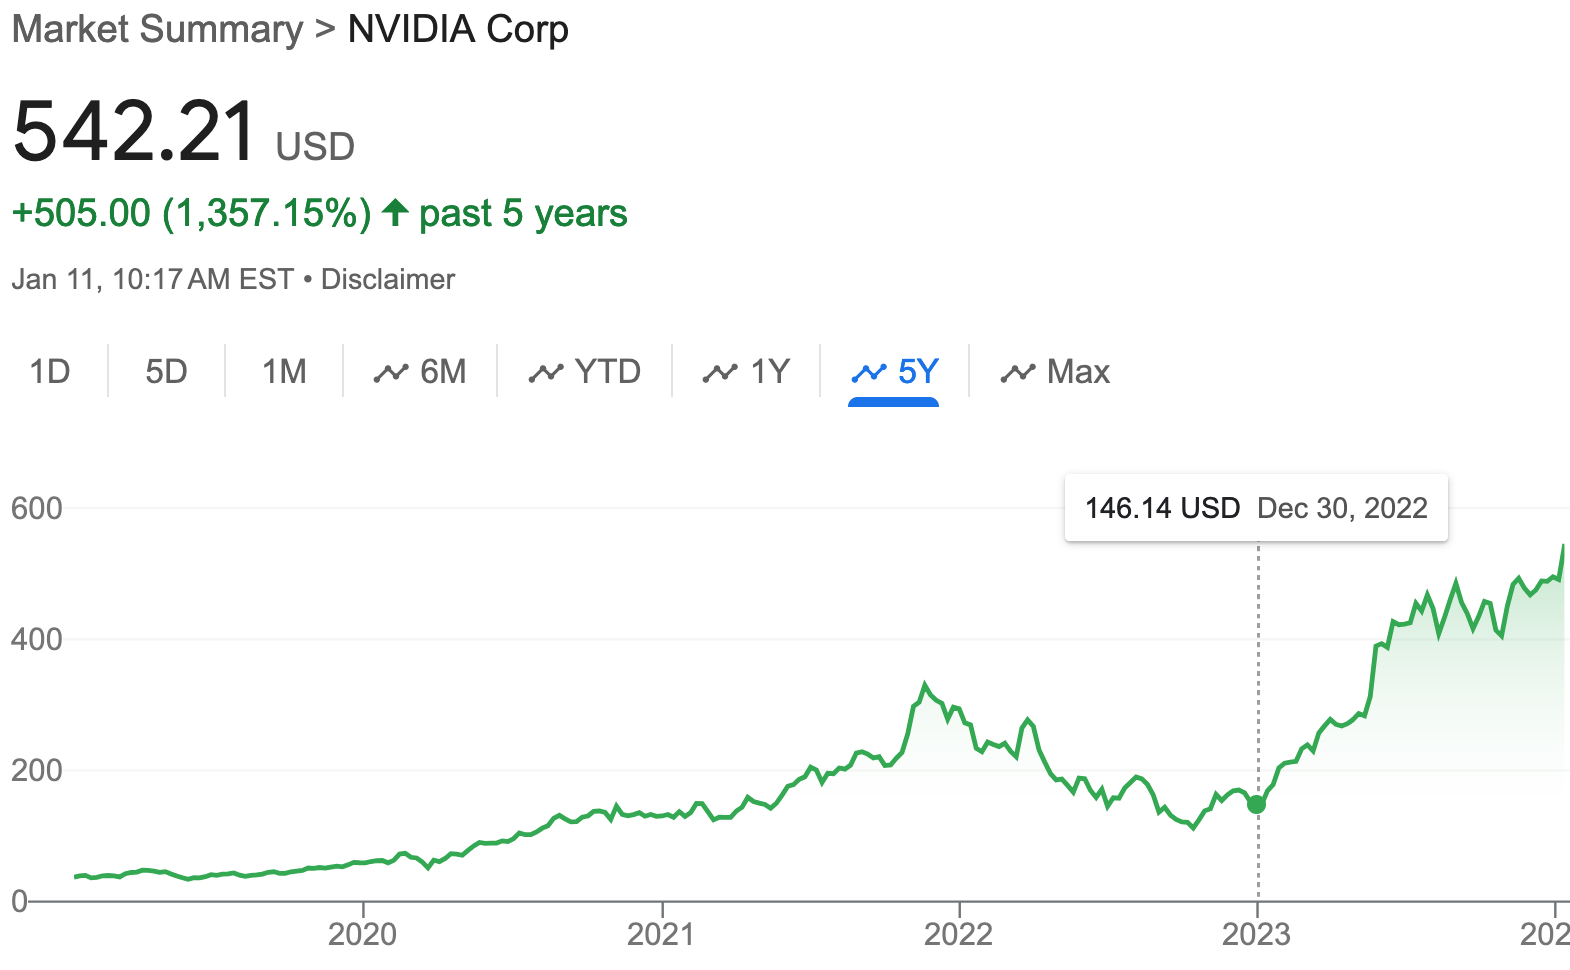


- You have access to a dozen great analysts who have no prior knowledge about generative AI and the hardware it requires.
- Each analyst has a low bias because they don’t have prior assumptions.
- Each analyst can learn about AI and Nvidia from a dataset of news reports.
- Each analyst has a high variance in their predicition when there is variation in the reports they receive.  

***Having access to news reports seems ideal for the task!***

### Problem: The reports are likely to contain noise in addition to real signals.

**Because your analysts will base their predictions entirely on the data (they have complete flexibility how), they can be swayed by irrelevant information.**


### Consequence:
* The analysts might each come up with very differing predictions from the same set of reports.
* Each analyst might come up with dramatically different predicition when they are given a different set of reports.


### ***The solution is to not rely on any one individual, but pool the votes of multiple analysts.***



# 5 Ensemble Learning with Bootstrap Aggregation (BAGGING)

- Uses a technique known as ***bootstrapping***.
- Reduces variance of individual models in an **ENSEMBLE** of the same algorithm
- One algorithm with different subsets of the training set.

### ***Basic Idea:*** Create multiple Decision Trees based on bootstrapped samples and go with the majority vote of the trees!

![BAGGING](https://mapxp.app/BUSI488/BAGGINGCART2.gif)

# 6 Empirical Application of BAGGING: ***Customer Eligibility for a Loan***

[*Based on an Analytics Vidhya practice competition*](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

A Fintech wants to automate the loan eligibility process (in real time) based on the details that applicants provide in their online application. These details are:

- Gender
- Marital Status
- Education
- Number of Dependents
- Income
- Loan Amount
- Credit History and others.

To automate this process, the Fintech needs to assign applicants to either being eligible for the requested loan (amount), or not. You are provided with a training dataset in which the loan eligibility is marked.
The dataset contains the following variables:

| Variable          	| Description                     	|
|-------------------	|---------------------------------	|
| Loan_ID           	| Unique Loan ID                  	|
| Gender            	| Male/ Female                    	|
| Married           	| Applicant married (Y/N)         	|
| Dependents        	| Number of dependents            	|
| Education         	| Graduate/ Under Graduate        	|
| Self_Employed     	| Self employed (Y/N)             	|
| ApplicantIncome   	| Applicant income                	|
| CoapplicantIncome 	| Coapplicant income              	|
| LoanAmount        	| Loan amount in thousands        	|
| Loan_Amount_Term  	| Term of loan in months          	|
| Credit_History    	| credit history meets guidelines 	|
| Property_Area     	| Urban/ Semi Urban/ Rural        	|
| Loan_Status       	| Loan approved (Y/N)             	|

You can download the dataset ***loan_train.csv*** from CANVAS along with the notebook of this class.

## 6.1 Load and Pre-Process the Data

In [ ]:
# Connect out notebook with out Google Drive and navigate to the directory in which we saved the data file(s)

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/488/Class18

In [ ]:
!ls # special shell command to view the files in the home directory of the notebook environment (! command has no lasting effect)

**A note on shell commands in python notebooks:** The difference between **!** and **%**

- **!** calls out to a shell (in a new process),
- **%** affects the process associated with the notebook (or the notebook itself)
- many **%** commands have no shell counterpart.

***!cd foo***, by itself, has no lasting effect, since the process with the changed directory immediately terminates.

***%cd foo*** changes the current directory of the notebook process, which is a lasting effect.

In [ ]:
#0 import some libraries that you will need for this step
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#1 import the data file
data_train = pd.read_csv("loan_train.csv") # parse to a Pandas DataFrame using pd.read_csv()

#2a Output the first 10 rows --> What do you observe?
data_train.head(10)

In [ ]:
#2b Let's get some descriptives
data_train.describe()

In [ ]:
#2c How many loan request were approved vs declined?
labels = 'Approved', 'Declined'
sizes = [data_train.Loan_Status[data_train['Loan_Status']=='Y'].count(), data_train.Loan_Status[data_train['Loan_Status']=='N'].count()]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels,  autopct='%1.2f%%', textprops={'fontsize': 20},
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Approved and Declined Loan Applications", size = 20)
plt.rcParams['font.size'] = 18  # makes label size bigger

plt.show()

In [ ]:
#2d We could also look at counts for individual features
print(data_train['Gender'].value_counts())

In [ ]:
#2e Let's create barcharts that show frequencies of approve vs. decline by categorical variable
fig, axarr = plt.subplots(3, 2, figsize=(16, 14))
sns.countplot(x='Married', hue = 'Loan_Status',data = data_train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Loan_Status',data = data_train, ax=axarr[0][1])
sns.countplot(x='Dependents', hue = 'Loan_Status',data = data_train, ax=axarr[1][0])
sns.countplot(x='Self_Employed', hue = 'Loan_Status',data = data_train, ax=axarr[1][1])
sns.countplot(x='Credit_History', hue = 'Loan_Status',data = data_train, ax=axarr[2][0])
sns.countplot(x='Property_Area', hue = 'Loan_Status',data = data_train, ax=axarr[2][1])

In [ ]:
#3 The first column (Loan_ID) is not informative to our task. So let's drop it!
data_train=data_train.drop(['Loan_ID'],axis=1)
data_train.head()

In [ ]:
#4 It's good practice to typecast categorical variables as such.
#4a Fist, check again what type they are
print(data_train.dtypes)

In [ ]:
#4b Make your work easy: Automatically identify which features are numeric and which are categorical.
# To do so, create two indices that hold the colum names of our data set that are numerical and categorical, respectively
# Make sure that you do not include our response variable here, since this is just about features!
numeric_features = data_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_train.select_dtypes(include=['object', 'category']).drop(['Loan_Status'], axis=1).columns

display(numeric_features)
display(categorical_features)

In [ ]:
#4c What about Credit_History? Should that not be a categorical variable?
numeric_features=numeric_features.drop('Credit_History')
categorical_features=categorical_features.insert(6, 'Credit_History')

display(numeric_features)
display(categorical_features)

In [ ]:
#4d Now typecast all variables that are categorical as type "category"
for col in categorical_features.tolist():
        data_train[col] = data_train[col].astype('category')

In [ ]:
#4e Don't forget to also typecast our response variable as category
data_train['Loan_Status'] = data_train['Loan_Status'].astype('category')

In [ ]:
#4f Check if it worked
print(data_train.dtypes)

In [ ]:
#4g What about Dependents? Should that not be an int64? List the unique values of Dependents. What do you see?
print(data_train.Dependents.unique())

In [ ]:
#5 What about Missing Data?
print(data_train.isnull().sum())

In [ ]:
#6 Let's impute the missing data with an imputer, for instance the SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

#6a Now you need to impute missing numerical values. What imputation strategy will you choose?
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(data_train[numeric_features.tolist()])
data_train[numeric_features.tolist()] = imputer.transform(data_train[numeric_features.tolist()])

#6b Now you need to impute missing categorical values.
imputercat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_train[categorical_features] = imputercat.fit_transform(data_train[categorical_features.tolist()])
data_train['Credit_History'] = data_train['Credit_History'].astype('category')   # imputer set type back to numeric, so we correct it again

#6c Check if you resolved all missing values
print(data_train.isnull().sum())

In [ ]:
#7 Create a new dataframe X that includes only our feature variables
X = data_train.loc[:, data_train.columns != 'Loan_Status']

#8 Create a new dataframe y that includes only our
y = data_train.Loan_Status

In [ ]:
#9 Now you need to one hot encode the categorical features to make them machine readable.
X = pd.get_dummies(X)
display(X.head())

In [ ]:
#10 And re-code the response variable using a dictionary and replace
repmap={"Y": 1, "N": 0}
y.replace(repmap, inplace=True)
display(y.head())

## 6.2 Feature engineering

Sometimes there is an opportunity to create new, meaningful features from existing ones. Similar to financial performance indicators such as P/E ratio or the ROI.

1. In our dataset, there are features for applicant income and co-applicant income. Together, these should be **"household income"**.

2. Another metric that we don't have in our data is equated monthly installment (**EMI**).
    * EMI is a fixed payment amount made by a borrower to a lender at a specified date each calendar month.
    * EMIs are used to pay off both interest and principal each month so that over a specified number of years, the loan is paid off in full.
    * In common loans such as real estate mortgages, auto loans, and student loans, the borrower makes fixed periodic payments to the lender over the course of several years with the goal of retiring the loan.  
    
    * EMI reducing-balance method = (Principal + Total Interest) / Loan Amount Term = P x r x ((1 + r)^n)/((1 + r)^n - 1) where:
        * P is the principal amount borrowed
        * r = I/12 is the periodic monthly interest rate
        * n is the total number of monthly payments      
    * Assuming an average interest rate of 6% for 30 years (**why 30 years?**) - which is about right, and precisely wrong - we calculate EMI from our features as follows:

  >    $r = 0.06/12$
    
  > $\text{EMI}=\frac{\textit{LoanAmount}\times 1000 \times r \times (1+r)^{\textit{LoanAmountTerm}}}{(1+r)^{\textit{LoanAmountTerm}}  - 1}$


    
**Calculate both new features, household income and EMI, below:**

In [ ]:
# 1 Feature engineer Household_Income_log (why log?) and add it to our features (X)
X['Household_Income_log']=np.log(X.ApplicantIncome + X.CoapplicantIncome)

# 2 Feature engineer EMI and add it to our features (X)
r = 0.06/12
X['EMI']=np.ceil(X['LoanAmount']*1000*r*((1+r)**X['Loan_Amount_Term'])/((1+r)**X['Loan_Amount_Term']-1)*100)/100

# 3 Append our two new features to our index of numerical features
numeric_features = numeric_features.append(pd.Index(['EMI','Household_Income_log']))

# 4 Take a look
X[['LoanAmount','Loan_Amount_Term','Household_Income_log', 'EMI']]

## 6.3 Baseline Predicition with a Classification Tree

### Let's take a look at how well we can predict customer eligibility using a Classification Tree

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test-set labels
y_pred_dt = dt.predict(X_test)

### So how well does our Classification Tree do?

In [ ]:
# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(f"Accuracy of Decision Tree Classifier is {round(accuracy_score(y_test, y_pred_dt)*100,2)}%")

## 6.4 Improved Prediction with BAGGING

In [ ]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(criterion='gini')

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(estimator=dt, n_estimators=25, n_jobs=-1,random_state=42)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred_bag = bc.predict(X_test)

# Output the accuracy of our prediction
print(f"Accuracy of Bagging Classifier is {round(accuracy_score(y_test, y_pred_bag)*100,2)}%")

# 7 Ensemble Learning with Random Forests: Pooling Experts
![Forest](https://mapxp.app/BUSI488/trees.jpg)

### Building a Random Forest

There are 4 steps involved in building a random forest:

    1. Create a ‘bootstrapped dataset’ from the original data.
    2. Create a decision tree using these bootstrapped data: sample features
    3. Rinse and Repeat 1 and 2 to create more decision trees.
    4. Take majority vote (Classification) or average (Regression)



### Feature Randomness  

In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node.   

In contrast, each tree in a random forest can pick only from a random subset of features.  

**This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.**

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.


![BAGGING](https://mapxp.app/BUSI488/RandomForest2.gif)

## 7.1 Improved Prediction with a Random Forest

In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
stratify=y,
random_state=42)

# Instantiate a random forests classifier
rf = RandomForestClassifier(n_estimators=25, bootstrap = True, min_samples_leaf = 5, criterion='gini', random_state=42)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred_rf = rf.predict(X_test)

# Output the accuracy of our prediction
print(f"Accuracy of Random Forest Classifier is {round(accuracy_score(y_test, y_pred_rf)*100,2)}%")

## 7.2 Visualizing Trees of a Random Forest

In [ ]:
# Static Image
from sklearn.tree import export_graphviz
from IPython.display import SVG
from sklearn import tree
from graphviz import Source
from IPython.display import display

# Let's visualize it!

# class labels
features = X_train.columns.to_list()

# generate the graph of the last tree (i.e., estimator) in the random forest ensemble: rf.estimators_[-1]
graph = Source(tree.export_graphviz(rf.estimators_[-1], out_file=None
              ,feature_names=features, class_names=['Decline','Approve']
              ,rounded=True
              ,filled = True))

#display the graph
display(SVG(graph.pipe(format='svg')))

#8 Feature Importance

### Advantage of Tree-based methods:
- Enable measuring the importance of each feature in prediction.
- WARNING: Does not reveal causality! This is not a model for statistical inference.

### In sklearn:
- How much the tree nodes use a particular feature (weighted average) to reduce impurity
  accessed using the attribute feature_importance_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue');
plt.show()

------


## ***Reflection Point:*** What business implication arises from our analysis and modelling?

------

# 9 Experts vs. Fools in Ensemble Learning


## 9.1 Boosting

**Boosting:** Ensemble method combining several weak learners to form a strong learner.  

**Weak learner:** Model doing slightly better than random guessing.  

**Example of weak learner:** Decision stump (CART whose maximum depth is 1).  


**Basic Idea:**
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
    * AdaBoost
    * Gradient Boosting

## 9.2 AdaBoost

- Stands for **Adaptive Boosting**.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefficient $\alpha$.
- $\alpha$ (alpha) depends on the predictor's training error.
- $\eta$ (eta) is the learning rate (shrinkage of $\alpha$)
    * small $\eta$ means the models trains slower (and sometimes better), but you need more estimators

### AdaBoost used both for Classification and Regression
- Classification:
    * Weighted majority voting.
    * In sklearn: AdaBoostClassifier
- Regression:
    * Weighted average.
    * In sklearn: AdaBoostRegressor
    
    
*Source: DataCamp*

## 9.3 Random Forest vs. AdaBoost (aka Experts vs. Fools)

#### Basic Idea of a Random Forest
- Each tree is a full-size tree
- Each tree can look different in terms of depth and splits
- Each tree can use multiple features to make a decision
- Each tree has equal weight in voting
- Each tree is made independently of the others
- Most trees have different samples to operate on (because of bootstrapping)


#### Basic Idea of AdaBoost for Decision Trees
- Usually uses stumps (root node with two leaves)
- Forest of stumps
- Stumps can only use one variable to make a decision (split)
- Stumps are not good at making accurate classifications = weak learners
- Some stumps have a greater say (i.e., significance) in the voting at the end than others (weighted by their accuracy)
- Stump order matters! Stumps are created in sequence, whereby the next stump implicitly takes the errors made by its predecessor into account for its own classification.


## 9.4 Steps in the AdaBoost Algorithm
1. Initialize a weight ($w_r$) for each record that indicates how important it is for the classification.  
   At the start, all records get the same weight ($1/R$), which makes them equally important.    
    
   
2. Make the best split: Determining which feature to split on based on the information gain (see recap of decision trees for details)  


3. Determine the total error of the stump: Sum of the weights ($w_r$) of the incorrectly classified records.  


4. Use the error of the classifier (i.e., the share of misclassified records) to determine how much say (i.e., vote) the particular stump has in the final classification, which is captured by $\alpha$ (also referred to as significance).  


5. Update (i.e., increase or decrease) the weights ($w_r$) for the records based on $\alpha$   
   and normalize all weights so that they sum to 1 (i.e., divide ***all*** records' weights by their sum).  
   
   
6. Create a new dataset of records:
    - of the same shape as the original dataset (i.e., the same number of rows and columns)
    - based on the normalized sample weights
    - by drawing $R$ records (with replacement)
    - where for each of $R$ draws you generate a random number between 0 and 1
    - and add the record to the new dataset whose cumulative weight (i.e., the sum of weights of all records "above" it in the table)
    - the randomly drawn number falls into.

    
7. Repeat steps 2-6.

## 9.5 Calculating Alpha
$\alpha_t= \frac{1}{2}ln\left ( \frac{1-\epsilon_t}{\epsilon_t} \right )= \;Significance\; = \frac{1}{2}ln\left ( \frac{1-Total\; Error_t}{Total\;  Error_t} \right )$

***Let's visualize Alpha for different error rates:***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18  # makes label size bigger
plt.figure(figsize=(6,6))
t = np.arange(0.01, 0.99, 0.001)
s = (1/2)*np.log((1-t)/t)
line, = plt.plot(t, s, lw=2)
plt.ylim(-2.5, 2.5)
plt.xlabel('Error Rate',fontsize = 14)
plt.ylabel('Alpha',fontsize = 14)
plt.title('Significance in AdaBoost')
plt.show()

**The above graph shows the intuition behind alpha in the final vote of the AdaBoost classifier:**

1. The classifier weight grows exponentially as the error approaches 0.   
    *Better classifiers are given exponentially more weight.*  
    

2. The classifier weight is zero if the error rate is 0.5.   
     *A classifier with 50% accuracy is no better than random guessing, so we ignore it.*  
     

3. The classifier weight grows exponentially negative as the error approaches 1.   
     *We give a negative weight to classifiers with worse than 50% accuracy.*   
     *Whatever that classifier says, do the opposite!*

## 9.6 Updating the Weights
We now update the weight for each record based on how well the current stump did overall and specifically for each record.

**Incorrectly classified records**

$w_{r,t+1} = w_{r,t} \times e^{\alpha_t} = New \;Record \;Weight \;= \;Record \;Weight \;\times\; e^{Significance}$

*There is nothing fancy going on here!*  
*All we do is raise $e$ to the power of the significance $\alpha_t$*  
*so that the new record weight grows exponentially*  
*(which increases its chance of being drawn for the sample of the next stump).*  


**Correctly classified records**  
Finally, look at the records that the tree classified correctly,  
and decrease their associated weights using the following formula:  

$w_{r,t+1} = w_{r,t} \times e^{- \alpha_t} = New \;Record \;Weight \;= \;Record \;Weight \;\times \;e^{- Significance}$

**Normalize Weights**  
Finally, we normalize all weights (for all records) by dividing the new weights by the sum of new weights.   

$\frac{w_{r,t+1}}{\sum_{r\in R}w_{r,t+1}}$


## 9.7 Constructing the New  Dataset

![AdaBoost1200](https://mapxp.app/BUSI488/AdaBoost1200.jpg)

## 9.9 Desirable Outcomes!

**Records which the previous stump incorrectly classified**
- should be associated with larger weights ...   
  ... so that they are more likely to be in the sample of the next stump   
  
  
- than the records that the current stump classified correctly ...   
  ... which will receive smaller weights and are thus less likely to be drawn in the next sample    
  


**Since the records that were incorrectly classified** have higher weights in relation to the others,   
      ... the likelihood that the random number falls under their slice of the distribution is greater
   
**Consequence:**
-  The new dataset will have a tendency to contain multiple copies of the records that were misclassified by the previous tree
- When we go back to the step where we evaluate the predictions made by each decision tree,   
  the one with the highest score will have correctly classified the records the previous tree misclassified.


## 9.10 Let's have some Fools predict loan eligibility! (AdaBoost)

![chainsaw](https://mapxp.app/MBA742/chainsaw.jpg)

In [ ]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import IPython
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
#Already done: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# # Instantiate an "fool" classification-tree 'fool'
fool = DecisionTreeClassifier(max_depth=1, criterion='gini', min_samples_leaf = 7, splitter = "random")

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(estimator=fool, n_estimators=25, learning_rate=.3, random_state=42)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test data
y_pred_ada = adb_clf.predict(X_test)

### ***So how about them fools?***
Can they do better? Let's check!

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Decision Tree Accuracy: {round(accuracy_score(y_test, y_pred_dt)*100,2)}%')
print(f'Bagging Accuracy: {round(accuracy_score(y_test, y_pred_bag)*100,2)}%')
print(f'Random Forest Accuracy: {round(accuracy_score(y_test, y_pred_rf)*100,2)}%')
print(f'Adaptive Boosting Accuracy: {round(accuracy_score(y_test, y_pred_ada)*100,2)}%')
if accuracy_score(y_test, y_pred_ada) > accuracy_score(y_test, y_pred_rf): IPython.display.display(IPython.display.Audio(url="https://mapxp.app/MBA488/foolswin.wav", autoplay=True))

# 10. XGBoost: Extreme Gradient Boosting

***XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.***

- Scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.
- Uses ensemble learning, that is, an ensemble of decision trees.
- Implements machine learning algorithms under the Gradient Boosting framework.
- Provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.
- The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

**Gradient boosting** is
- An extension of boosting where the process of additively generating weak models is formalized as a gradient descent algorithm over an objective function.
- Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors.
- Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting) with respect to the prediction.

***Random forest “bagging” minimizes the variance and overfitting, whereas GBDT “boosting” minimizes the bias and underfitting.***

*XGBoost is the leading machine learning library for regression, classification, and ranking problems:*



[Read more about XGBoost](https://xgboost.readthedocs.io/en/stable/index.html)

In [ ]:
# Import XGBoost
import xgboost as xgboost

# Instantiate Classifier
xgb = xgboost.XGBClassifier(n_estimators=25, subsample=.9,colsample_bytree=.1, eta=.3, seed=42)

# Fit Classifier to training data
xgb.fit(X_train, y_train)

# Predict test data with trained classifier
y_pred_xg = xgb.predict(X_test)

# Evaluate performance of test predictions
print(f'Extreme Gradient Boosting Accuracy: {round(accuracy_score(y_test, y_pred_xg)*100,2)}%')